In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base_dir = r"C:\Users\18138\Desktop\data anly\Training Image sp 23"

In [3]:
subdirs = os.listdir(base_dir)
class_names = sorted(subdirs)
img_size = (224, 224)
batch_size = 32

In [4]:
# Split the data into training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    classes=class_names,
    class_mode='categorical',
    subset='training')

valid_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    classes=class_names,
    class_mode='categorical',
    subset='validation')

Found 1659 images belonging to 16 classes.
Found 179 images belonging to 16 classes.


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='softmax')
])

In [6]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=valid_generator,epochs=50)



Epoch 1/50
52/52 [==============================] - 56s 1s/step - loss: 2.7333 - accuracy: 0.0976 - val_loss: 2.5225 - val_accuracy: 0.2123
Epoch 2/50
52/52 [==============================] - 54s 1s/step - loss: 2.4671 - accuracy: 0.1851 - val_loss: 2.1999 - val_accuracy: 0.2402
Epoch 3/50
52/52 [==============================] - 54s 1s/step - loss: 2.2891 - accuracy: 0.2514 - val_loss: 1.9982 - val_accuracy: 0.3296
Epoch 4/50
52/52 [==============================] - 55s 1s/step - loss: 2.1008 - accuracy: 0.3273 - val_loss: 1.8630 - val_accuracy: 0.3799
Epoch 5/50
52/52 [==============================] - 55s 1s/step - loss: 1.9298 - accuracy: 0.3605 - val_loss: 1.9196 - val_accuracy: 0.3799
Epoch 6/50
52/52 [==============================] - 55s 1s/step - loss: 1.8579 - accuracy: 0.3978 - val_loss: 1.8167 - val_accuracy: 0.4246
Epoch 7/50
52/52 [==============================] - 54s 1s/step - loss: 1.7145 - accuracy: 0.4346 - val_loss: 1.6631 - val_accuracy: 0.4469
Epoch 8/50
52/52 [==

In [7]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(valid_generator)

# Print the validation accuracy
print('Validation Accuracy:', accuracy)


6/6 [==============================] - 4s 558ms/step - loss: 2.3244 - accuracy: 0.5698
Validation Accuracy: 0.5698323845863342


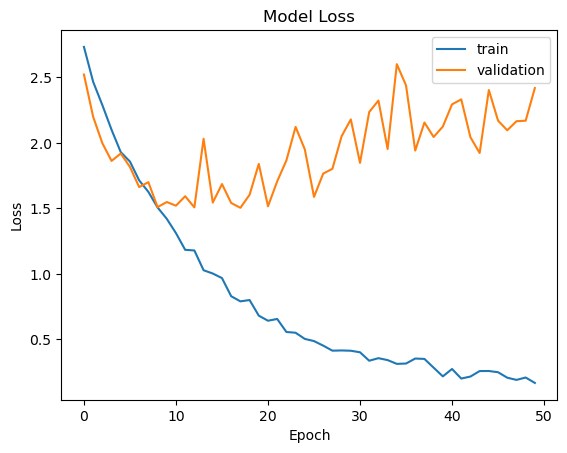

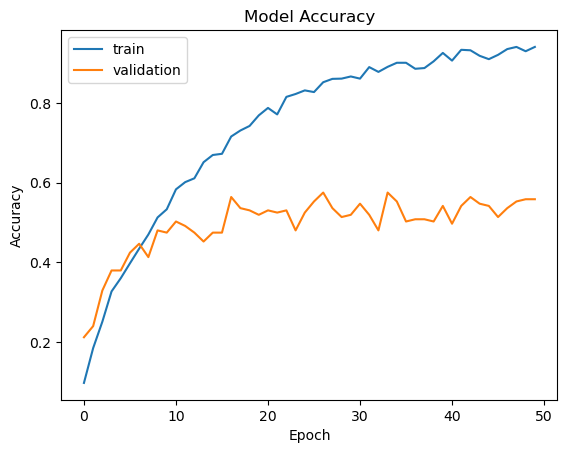

In [23]:
import matplotlib.pyplot as plt

# Plot the normal and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the normal and validation accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
# Define the base directory containing the image data
test_dir = r"C:\Users\18138\Desktop\data anly\Test Image sp 23"



In [9]:
import cv2
#print("---------------------TEST_DATA_READING OF DATA --------------------")

test_clsname = [name for name in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, name))]
#print("---------------------CLASSES --------------------")
#print(f"CLASSES LIST: {test_clsname}")
#print("---------------------LENGTH OF CLASSES --------------------")
#print(len(test_clsname))
img_size = 224
test_data = [] 
label = 0
while label < len(test_clsname):
    category = test_clsname[label]
    print(label)
    print(category)
    #print("---------------------CATEG,LABL --------------------")
    #print(f"CATEGORY:LABELS= {category,label}")
    path = os.path.join(test_dir, category)
    img_name_index = 0
    while img_name_index < len(os.listdir(path)):
        img_name = os.listdir(path)[img_name_index]
        img_path = os.path.join(path, img_name)
        #print(img_name)
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
            img_arr = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img_arr = cv2.resize(img_arr, (img_size, img_size))
            #print(img_name)
            test_data.append([img_arr, label,img_name])
            #plt.imshow(img_arr)
            #plt.show()
            #print(img_name)
        img_name_index += 1
    label += 1

0
Adult
1
Airplane
2
Alpaca
3
Bird
4
Bus
5
Car
6
Cat
7
Child
8
Elephant
9
Flower
10
Giraffe
11
Horse
12
Monkey
13
Panda
14
Reptile
15
Vessel


In [10]:
test_image_generator = ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(
    batch_size=32,
    directory=test_dir,
    shuffle=False,
    target_size=(224,224),
    class_mode='categorical'
)

Found 480 images belonging to 16 classes.


In [22]:
loss, accuracy = model.evaluate(test_data_gen)

# Print the test accuracy
print('Test Accuracy:', accuracy*100)

15/15 [==============================] - 7s 456ms/step - loss: 3.4775 - accuracy: 0.4729
Test Accuracy: 47.29166626930237


In [12]:
import numpy as np

# Make predictions on the test data
predictions = model.predict(test_data_gen)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

predicted_labels

15/15 [==============================] - 6s 375ms/step


array([13,  6, 15, 12,  0,  0,  6,  0, 14,  0,  2,  0,  0,  0,  0,  0,  0,
        0, 15,  6,  0,  3,  7,  5,  7,  6,  4,  7,  0,  5, 15,  3,  1,  5,
        1,  1, 15,  1,  1,  1,  1,  1,  1, 15,  4,  1,  5,  1,  5,  1,  1,
        1, 15,  4,  4, 14,  0,  1,  1, 15, 10,  0,  2, 13, 11,  2, 10,  0,
       14,  2,  2,  2,  0,  2, 13,  2,  8, 10,  2, 10,  2, 13,  9, 13,  3,
       10,  2,  8,  6, 12, 12, 15,  4, 14,  0,  8,  9,  1,  8,  0,  5,  3,
        3,  0,  9,  1,  1, 11,  0, 13,  7, 15,  3,  3,  1,  1,  1, 11, 10,
        5,  5,  5,  5,  4,  4,  4,  4,  0,  4,  4,  4,  4,  4,  4,  5,  4,
        4,  4,  4,  4,  4,  4,  4, 15,  4,  4,  4,  4,  4,  4,  5,  4,  4,
        1,  5, 15,  5,  5,  4, 12,  5, 15,  5,  5,  5,  4,  4,  5,  4,  5,
        5,  1,  5,  1,  4,  5,  5,  7,  5,  4,  3,  9,  6, 14,  7, 12,  6,
       15, 12,  6,  0,  6,  6,  7,  6, 14,  6,  7,  6, 13,  2,  9,  0,  3,
        0,  3,  7,  9,  6, 10,  7,  7, 12,  0,  6,  0,  4,  7,  7,  7,  7,
        6,  7,  9,  6,  0

In [13]:
test_labels=[i[1] for i in test_data]
print(test_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

In [14]:
test_imgname=[i[2] for i in test_data]
print(test_imgname)

['test_adult (1).jpg', 'test_adult (10).jpg', 'test_adult (11).jpg', 'test_adult (12).jpg', 'test_adult (13).jpg', 'test_adult (14).jpg', 'test_adult (15).jpg', 'test_adult (16).jpg', 'test_adult (17).jpg', 'test_adult (18).jpg', 'test_adult (19).jpg', 'test_adult (2).jpg', 'test_adult (20).jpg', 'test_adult (21).jpg', 'test_adult (22).jpg', 'test_adult (23).jpg', 'test_adult (24).jpg', 'test_adult (25).jpg', 'test_adult (26).jpg', 'test_adult (27).jpg', 'test_adult (28).jpg', 'test_adult (29).jpg', 'test_adult (3).jpg', 'test_adult (30).jpg', 'test_adult (4).jpg', 'test_adult (5).jpg', 'test_adult (6).jpg', 'test_adult (7).jpg', 'test_adult (8).jpg', 'test_adult (9).jpg', 'test_airplane (1).jpg', 'test_airplane (10).jpg', 'test_airplane (11).jpg', 'test_airplane (12).jpg', 'test_airplane (13).jpg', 'test_airplane (14).jpg', 'test_airplane (15).jpg', 'test_airplane (16).jpg', 'test_airplane (17).jpg', 'test_airplane (18).jpg', 'test_airplane (19).jpg', 'test_airplane (2).jpg', 'test_ai

In [21]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, predicted_labels))


              precision    recall  f1-score   support

           0       0.25      0.43      0.32        30
           1       0.48      0.53      0.51        30
           2       0.42      0.33      0.37        30
           3       0.27      0.13      0.18        30
           4       0.49      0.80      0.61        30
           5       0.44      0.50      0.47        30
           6       0.36      0.30      0.33        30
           7       0.48      0.43      0.46        30
           8       0.55      0.37      0.44        30
           9       0.54      0.50      0.52        30
          10       0.40      0.57      0.47        30
          11       0.74      0.47      0.57        30
          12       0.40      0.27      0.32        30
          13       0.64      0.83      0.72        30
          14       0.50      0.27      0.35        30
          15       0.66      0.83      0.74        30

    accuracy                           0.47       480
   macro avg       0.48   

In [16]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(test_labels, predicted_labels)
print(cm)

[[13  0  1  1  1  2  4  3  0  0  0  0  1  1  1  2]
 [ 1 16  0  1  3  3  0  0  0  0  0  0  0  0  1  5]
 [ 3  0 10  1  0  0  1  0  2  1  5  1  1  4  1  0]
 [ 4  6  0  4  1  2  0  1  2  2  1  2  1  1  1  2]
 [ 1  0  0  0 24  4  0  0  0  0  0  0  0  0  0  1]
 [ 0  3  0  0  8 15  0  1  0  0  0  0  1  0  0  2]
 [ 3  0  1  3  0  0  9  4  0  3  1  0  2  1  2  1]
 [ 9  0  0  0  3  0  3 13  0  1  0  0  1  0  0  0]
 [ 0  1  4  1  0  0  0  0 11  1 11  0  0  1  0  0]
 [ 6  0  1  0  3  0  0  0  0 15  0  1  2  1  1  0]
 [ 1  1  3  0  1  1  2  2  0  1 17  0  1  0  0  0]
 [ 2  0  4  1  0  1  0  1  3  1  2 14  0  1  0  0]
 [ 3  2  0  2  0  2  3  1  2  3  1  0  8  2  1  0]
 [ 0  0  0  1  0  1  0  0  0  0  0  1  2 25  0  0]
 [ 4  1  0  0  4  3  3  1  0  0  4  0  0  2  8  0]
 [ 1  3  0  0  1  0  0  0  0  0  0  0  0  0  0 25]]


In [20]:
import pandas as pd
data = {'GIVEN TEST IMG': test_imgname, 'GIVEN TEST CLASS': test_labels, 'PREDICTED CLASS': predicted_labels}
df = pd.DataFrame(data)
df.to_csv("cnn.csv", index=False)